# Question 1

In [392]:
import pandas as pd
import matplotlib.pyplot as plt

### Part A

In [393]:
# Load the train and test datasets into a Pandas DataFrame.
trainData = pd.read_csv("/Users/cwbenton/MATH4140/HW/HW3/titanic/train.csv")
testData = pd.read_csv("/Users/cwbenton/MATH4140/HW/HW3/titanic/test.csv")

### PART B

In [394]:
# Explore categorical and continuous input variables appropriately
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [395]:
# Only standardize continuous variables, so it's good to separate.
continuous = ["Age", "SibSp", "Parch", "Fare"]

# Only encode categorical variables.
categorical = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]

In [396]:
# Here, we look at each variable (mainly categorical ones) to see if there are coded nulls.
# There don't seem to be any coded nulls.
for col in trainData.columns:
    print(trainData[col].value_counts())

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00

In [397]:
# See if there are NaN values for our variables. We will have to do some imputing.
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [398]:
# Explicitly state our features matrix and target series. These may be useful to have as variables.
features = trainData.drop(columns=["Survived"])
target = trainData["Survived"]

In [399]:
# We will begin looking at continuous histograms to assess skew.
features[continuous].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

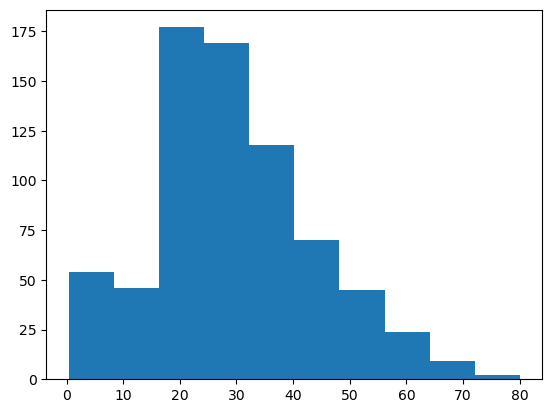

In [400]:
# The age variable is slightly skewed right. Median imputation is best.
plt.hist(features['Age'])

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

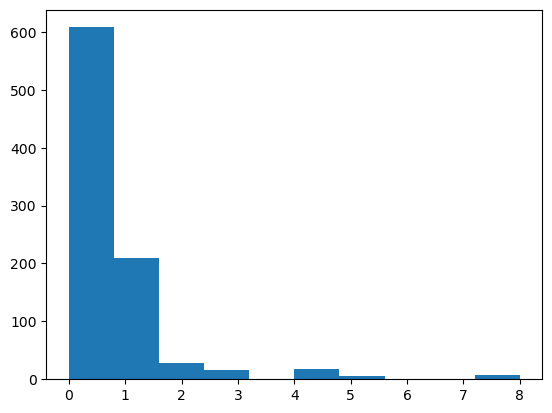

In [401]:
# View histogram for SibSp
plt.hist(features["SibSp"])

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

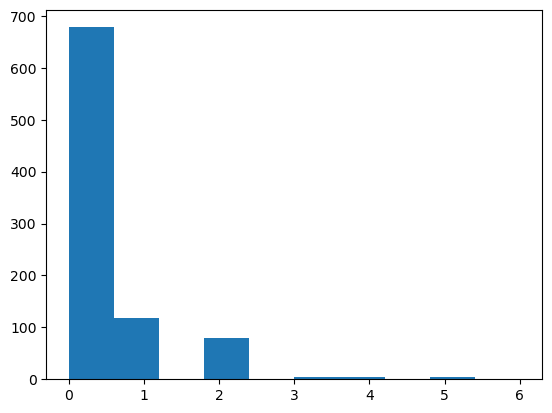

In [402]:
# View histogram for Parch
plt.hist(features["Parch"])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

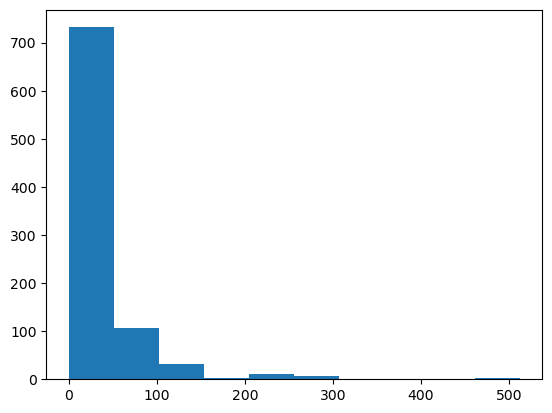

In [403]:
# View histogram for fare.
plt.hist(features["Fare"])

From the above histograms for our continuous variables, we see that they are all pretty skewed. When we standardize our variables, it will be best to use `RobustScalar` for them due to the outliers.

### Part C

Preprocess the data

In [404]:
# Drop the cabin variable
features.drop(columns=["Cabin"], inplace=True)
testData.drop(columns=["Cabin"], inplace=True)

# Impute NaN age values with median age since the age distribution is skewed right.
features["Age"].fillna(features["Age"].median(), inplace=True)
testData["Age"].fillna(testData["Age"].median(), inplace=True)

# The two null values for Embarked will be replaced with the mode.
# The mode() function returns a series, so we need to get the first element, that is why [0] is here.
features["Embarked"].fillna(features["Embarked"].mode()[0], inplace=True)
testData["Embarked"].fillna(testData["Embarked"].mode()[0], inplace=True)

# There is a null value for Fare in the test dataset. Impute with median
testData["Fare"].fillna(testData["Fare"].median(), inplace=True)

# View null counts for training dataset
features.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [405]:
# View null counts for test data.
testData.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [406]:
# Our features table is now clean from any NaN values.
features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [407]:
# Our test data is also clean from any null values. We will now only work with the training data.
testData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


### Part D

Feature Engineering

In [408]:
continuous

['Age', 'SibSp', 'Parch', 'Fare']

In [409]:
# We need to scale our quantitative variables and Encode our categorical variables.
# We will use robust scalar for our quantitative variables.
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()

# Scale the train dataset features.
scaled_Features_Train = scaler.fit_transform(features[continuous])
scaled_Features_Train = pd.DataFrame(scaled_Features_Train, columns=continuous)

# Scale the test dataset features.
# IMPORTANT: Do not use the fit_transform for test dataset. Only for the train dataset.
scaled_Features_Test = scaler.transform(testData[continuous])
scaled_Features_Test = pd.DataFrame(scaled_Features_Test, columns=continuous)

In [410]:
scaled_Features_Train

,Age,SibSp,Parch,Fare
0,-0.461538,1.0,0.0,-0.312011
1,0.769231,1.0,0.0,2.461242
2,-0.153846,0.0,0.0,-0.282777
3,0.538462,1.0,0.0,1.673732
4,0.538462,0.0,0.0,-0.277363
...,...,...,...,...
886,-0.076923,0.0,0.0,-0.062981
887,-0.692308,0.0,0.0,0.673281
888,0.000000,1.0,2.0,0.389604
889,-0.153846,0.0,0.0,0.673281


We have scaled our continuous variables. Now, we should encode our categorical variables.

In [411]:
# Let's take a look at the categorical variables we have
categorical

['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [412]:
'''
I argue we can drop the PassengerId and Name columns. Since we are trying to predict survival, and
the name of someone is unique, it would be silly to use it as a feature in our model. Same thing with
the PassengerId -- it is also a unique identifier and will not provide insight on the survivability
of an individual.
We also have a Ticket feature, which is a ticket number. Since these are also unique values, it may
not be useful in using it in the model.
We will drop these columns in our train and test data.
'''
# Drop these columns from training data.
features.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

# Drop these columns from testing data.
testData.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [413]:
# Let's adjust our categorical variable now. These will be encoded.
categorical = ['Pclass', 'Sex', 'Embarked']

In [414]:
from sklearn.preprocessing import OneHotEncoder

# Concatenate train and test data. We should do this to keep the dummy codes consistent.
combined_data = pd.concat([features[categorical], testData[categorical]], axis=0)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the encoder on the combined data
encoded_data = encoder.fit_transform(combined_data[categorical])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical))

# Split back into train and test data since we concatonated at the beginning.
train_data_encoded = encoded_df[:len(features[categorical])]
test_data_encoded = encoded_df[len(features[categorical]):]

In [415]:
# Since we have dummy coded the categorical variables, we don't need them anymore. Drop them.
X_train_features_encoded = features.drop(categorical, axis=1)
X_train_features_encoded

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,28.0,1,2,23.4500
889,26.0,0,0,30.0000


In [416]:
# Also drop them for the test dataset.
X_test_features_encoded = testData.drop(categorical,axis=1)
X_test_features_encoded

,Age,SibSp,Parch,Fare
0,34.5,0,0,7.8292
1,47.0,1,0,7.0000
2,62.0,0,0,9.6875
3,27.0,0,0,8.6625
4,22.0,1,1,12.2875
...,...,...,...,...
413,27.0,0,0,8.0500
414,39.0,0,0,108.9000
415,38.5,0,0,7.2500
416,27.0,0,0,8.0500


In [417]:
# Make sure to reset index so we don't get nulls when we concat.
test_data_encoded.reset_index(drop=True, inplace=True)

In [418]:
df_final_train = pd.concat([scaled_Features_Train, train_data_encoded], axis=1)
df_final_test = pd.concat([scaled_Features_Test, test_data_encoded], axis=1)

In [419]:
df_final_train

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.461538,1.0,0.0,-0.312011,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.769231,1.0,0.0,2.461242,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.153846,0.0,0.0,-0.282777,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.538462,1.0,0.0,1.673732,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.538462,0.0,0.0,-0.277363,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.076923,0.0,0.0,-0.062981,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,-0.692308,0.0,0.0,0.673281,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.000000,1.0,2.0,0.389604,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,-0.153846,0.0,0.0,0.673281,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [420]:
df_final_test

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.500000,0.0,0.0,-0.286926,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.461538,1.0,0.0,-0.322838,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2.615385,0.0,0.0,-0.206444,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.076923,0.0,0.0,-0.250836,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.461538,1.0,1.0,-0.093839,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.076923,0.0,0.0,-0.277363,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
414,0.846154,0.0,0.0,4.090404,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
415,0.807692,0.0,0.0,-0.312011,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
416,-0.076923,0.0,0.0,-0.277363,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


We have successfully standardized and encoded our data. We now have our final train and test datasets.

### Part E

In [421]:
# Split the train dataset into training and validation, and identify the target variable.
# Here, the target variable is Survived -- we want to see if we can predict if a passenger survived.
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(df_final_train, trainData["Survived"], test_size=0.20)

### Part F

In [422]:
# Implement Naïve Bayes, find best hyperparameters by tuning them, and report the test accuracies.
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)

GaussianNB()

In [423]:
y_pred_f = gnb_model.predict(X_val)
y_pred_f

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [424]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_val, y_pred_f)))

Model accuracy score: 0.7933


For a GaussianNB model, we get an accuracy score of 77.09%

### Part G

In [425]:
# Implement k-NN, and report the test accuracies. 
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=8)
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [426]:
y_pred_g = model_knn.predict(X_val)
y_pred_g

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [427]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_val, y_pred_g)))

Model accuracy score: 0.8212


### Part H: Implement Random Forest

In [428]:
# Import the class
from sklearn.ensemble import RandomForestClassifier

# View the parameters to adjust for Random Forests:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [429]:
# Identify best hyperparameters through a grid.
model_rfc = RandomForestClassifier()

# Explore possible hyperparameters.
param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'n_jobs': [-1]
}

In [430]:
# Import the Grid Search
from sklearn.model_selection import GridSearchCV

grid_h = GridSearchCV(model_rfc, param_grid_rfc, cv=3)

In [431]:
grid_h.fit(X_train, Y_train)

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'